```python
class layer():
    self.layer_ID
    self.seg_num
    self.mask
```

In [1]:
from lime.wrappers.scikit_image import SegmentationAlgorithm
from sklearn.utils import check_random_state
from skimage.color import gray2rgb
import numpy as np

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt

from skorch import NeuralNetClassifier
import sys
sys.path.append('E:/Projects/XAI/BHEM')
sys.path.append('/run/media/xiangyu/Data/Projects/XAI/BHEM')
from model.classifier import Cnn, getClassifier

# Load model

In [3]:
torch.manual_seed(0)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
cnn = getClassifier(Cnn, device, f_params='../../MINST.pkl')

# Load MINST dataset

In [4]:
from dataset import handwriting
mnist = handwriting('mnist_784', normalize=True)

# Test the model

In [5]:
testnum = 50
Images = mnist.XCnn[:testnum]
Xlabel = cnn.predict(Images)
Images.shape, Xlabel.shape

((50, 1, 28, 28), (50,))

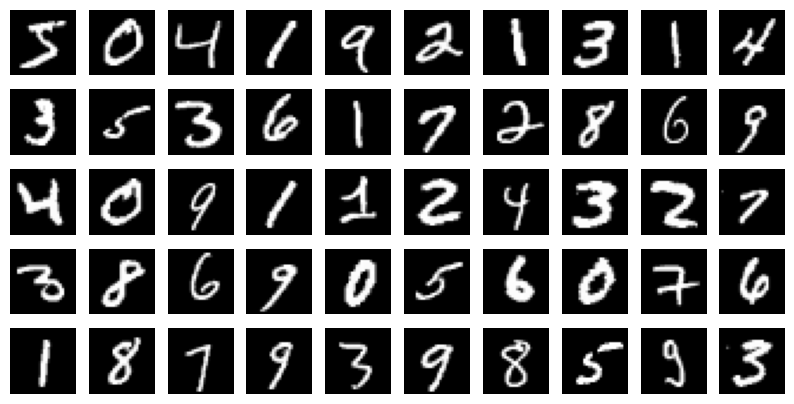

In [6]:
plt.figure(figsize=(10, 5))
for i in range(testnum):
    plt.subplot(5, 10, i+1)
    plt.imshow(Images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

---

In [7]:
from bhem import layer, BhemExp

# Test single layer

In [8]:
import imageio
# Read the PNG image and convert it to a numpy array
image_array = imageio.imread('./banana-kiwi.png')

# Print the shape of the image array
# Convert the image array from 4 channels to 3 channels
image_array_3_channels = image_array[:, :, :3]

# Print the shape of the modified image array
print(image_array_3_channels.shape)

(28, 28, 3)


/tmp/ipykernel_18631/1600381296.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread('./banana-kiwi.png')


## Before masking image

img = Images[17].reshape(28, 28)
# img = image_array_3_channels
layer_test = layer(img, layer_ID=2, seg_func='basic', random_state=None, random_seed=None)
layer_test.print_info(draw=True)

## After masking image

In [9]:
# layer_test.mask_image([2,4,7])
# layer_test.print_info(draw=True)

---

# Parent Class Test

In [10]:
import imageio
# Read the PNG image and convert it to a numpy array
image_array = imageio.imread('./banana-kiwi.png')

# Print the shape of the image array
# Convert the image array from 4 channels to 3 channels
image_array_3_channels = image_array[:, :, :3]

image_array = imageio.imread('./gray.png')

image_array_grey = image_array[:, :]

# Print the shape of the modified image array
print(image_array_3_channels.shape, image_array_grey.shape)

(28, 28, 3) (28, 28)


/tmp/ipykernel_18631/1037854213.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread('./banana-kiwi.png')
/tmp/ipykernel_18631/1037854213.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread('./gray.png')


In [11]:
img_ID = 5
img = Images[img_ID].reshape(28, 28)
label = Xlabel[img_ID]
# img = image_array.astype(np.float32)
bhem_exp = BhemExp(img, layer_num=4, random_state=None, random_seed=None)

In [12]:
img_ID = 5
orig_img = Images[img_ID].reshape(28, 28)


In [13]:
bhem_exp.print_explanation_info()

INFO: Explanaion Info:
            layer_num:          4
            layers_mapping:     dict_keys(['12', '23', '34', '21', '32', '43'])
        
INFO: Layer 1
            layer_ID:           1
            segment_num:        3
            seg_keys:           dict_keys([0, 1, 2])
            segment:            Not Draw
            seg_active:         None
            masked_image:       Not Draw
        
INFO: Layer 2
            layer_ID:           2
            segment_num:        9
            seg_keys:           dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])
            segment:            Not Draw
            seg_active:         None
            masked_image:       Not Draw
        
INFO: Layer 3
            layer_ID:           3
            segment_num:        49
            seg_keys:           dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48

## Test keys

In [14]:
for key in bhem_exp.mappings.keys():
    print(f"Mapping {key}:")
    for i in bhem_exp.mappings[key].keys():
        print(i)

Mapping 12:
0
1
2
Mapping 23:
0
1
2
3
4
5
6
7
8
Mapping 34:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
Mapping 21:
0
1
2
3
4
5
6
7
8
Mapping 32:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
Mapping 43:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
18

## Test masking image

In [15]:
img = bhem_exp.get_current_masked_image([[0],[3,5],[],[]])

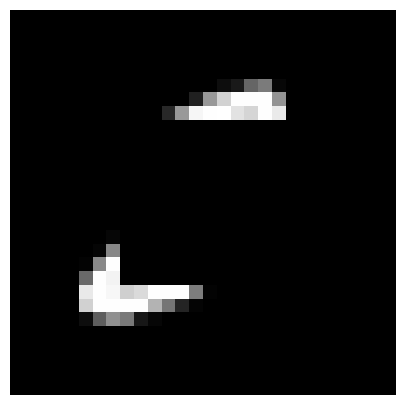

In [16]:
plt.figure(figsize=(10, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

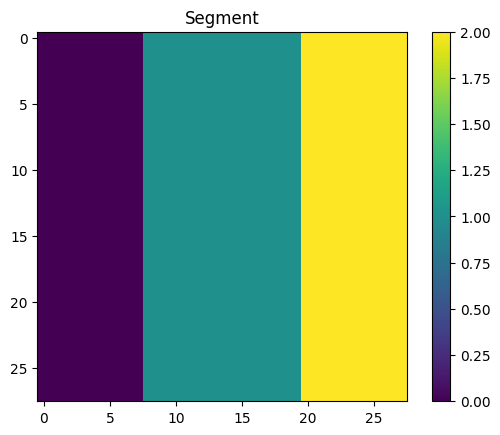

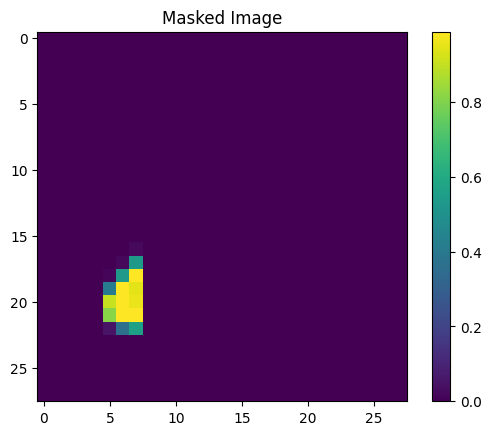

INFO: Layer 1
            layer_ID:           1
            segment_num:        3
            seg_keys:           dict_keys([0, 1, 2])
            segment:            Plot Segment
            seg_active:         [0]
            masked_image:       Plot Masked Image
        


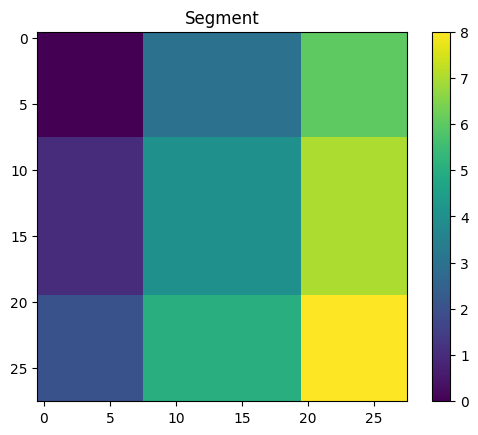

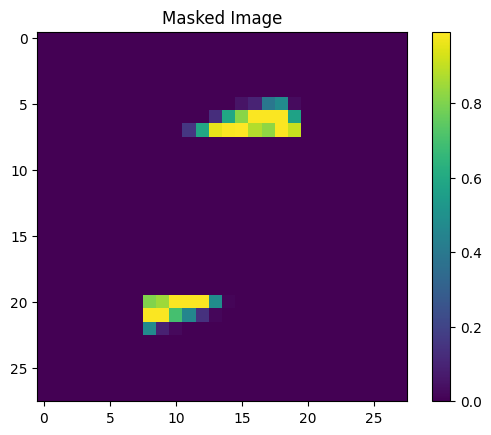

INFO: Layer 2
            layer_ID:           2
            segment_num:        9
            seg_keys:           dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])
            segment:            Plot Segment
            seg_active:         [3, 5]
            masked_image:       Plot Masked Image
        


(None, None)

In [17]:
bhem_exp.layers[1].print_info(draw=True),bhem_exp.layers[2].print_info(draw=True)

## Test `get_explanation()`

In [18]:
scores = bhem_exp.get_explanation(cnn.predict_proba,label)

Layer 3: 100%|██████████| 4/4 [00:08<00:00,  2.04s/it]


---

In [19]:
scores.shape

(1, 10, 196)

In [20]:
result = scores.reshape(1,10, 14, 14)

In [1]:
result
np.save('result_array.npy', result)

NameError: name 'result' is not defined

In [22]:
result = np.load('result_array.npy')

In [23]:
result.shape

(1, 10, 14, 14)

In [24]:
import torch.nn.functional as F

resized_images = F.interpolate(torch.tensor(result), size=(28, 28), mode='bilinear', align_corners=False).numpy()

In [25]:
resized_images.shape

(1, 10, 28, 28)

In [26]:
from matplotlib.colors import LinearSegmentedColormap
colors = []
for j in np.linspace(1, 0, 100):
    colors.append((30./255, 136./255, 229./255,j))
for j in np.linspace(0, 1, 100):
    colors.append((255./255, 13./255, 87./255,j))
red_transparent_blue = LinearSegmentedColormap.from_list("red_transparent_blue", colors)

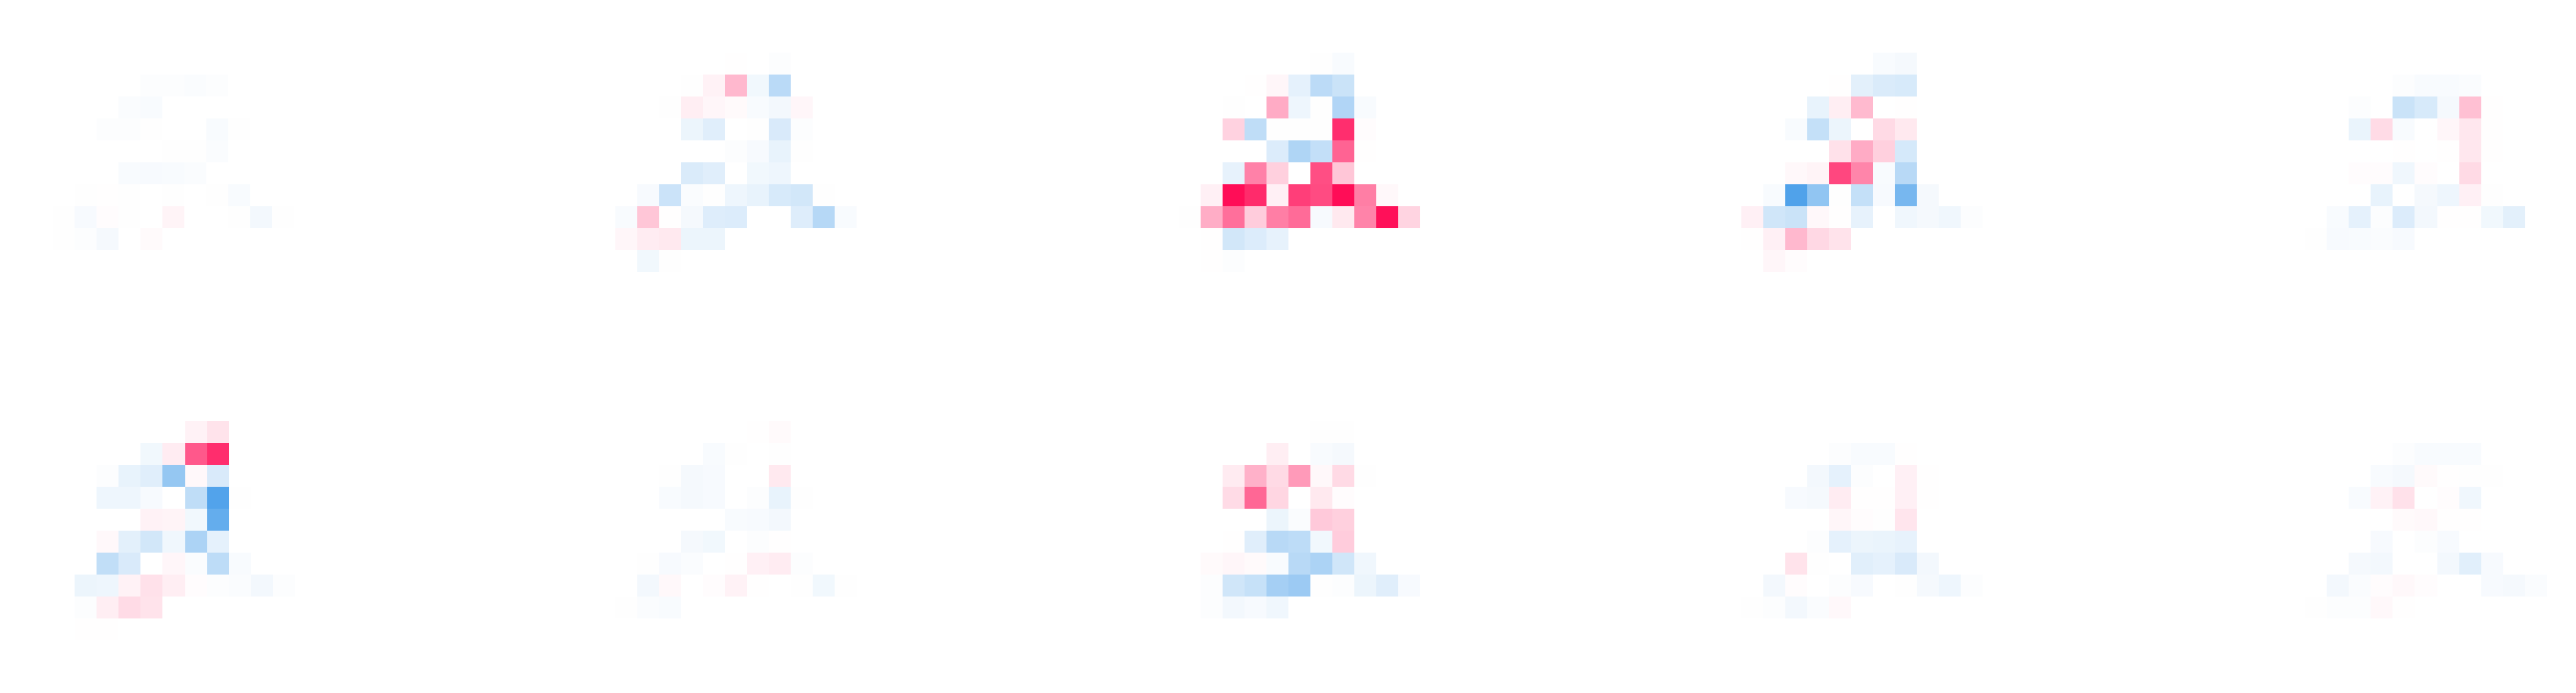

In [27]:
plt.figure(figsize=(40, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(result[0][i], cmap=red_transparent_blue, vmin=-np.nanpercentile(result[0], 99.9),vmax=np.nanpercentile(result[0], 99.9))
    plt.axis('off')
plt.show()

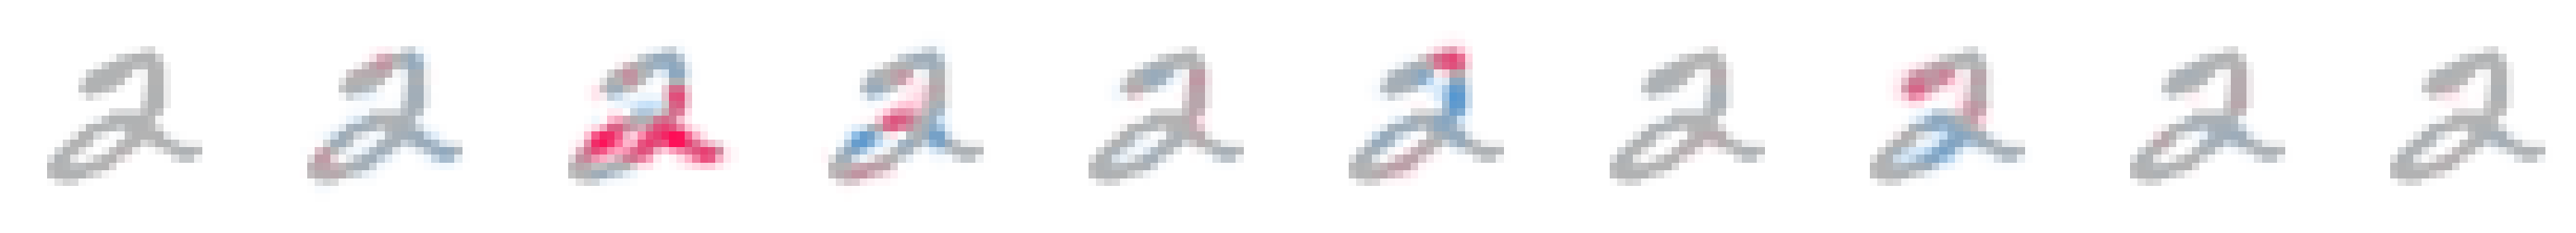

In [28]:
plt.figure(figsize=(40, 10))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(-bhem_exp.image, cmap='gray', alpha=0.3)
    plt.imshow(resized_images[0][i], cmap=red_transparent_blue, vmin=-np.nanpercentile(result[0], 99.9),vmax=np.nanpercentile(result[0], 99.9))
    plt.axis('off')

plt.show()

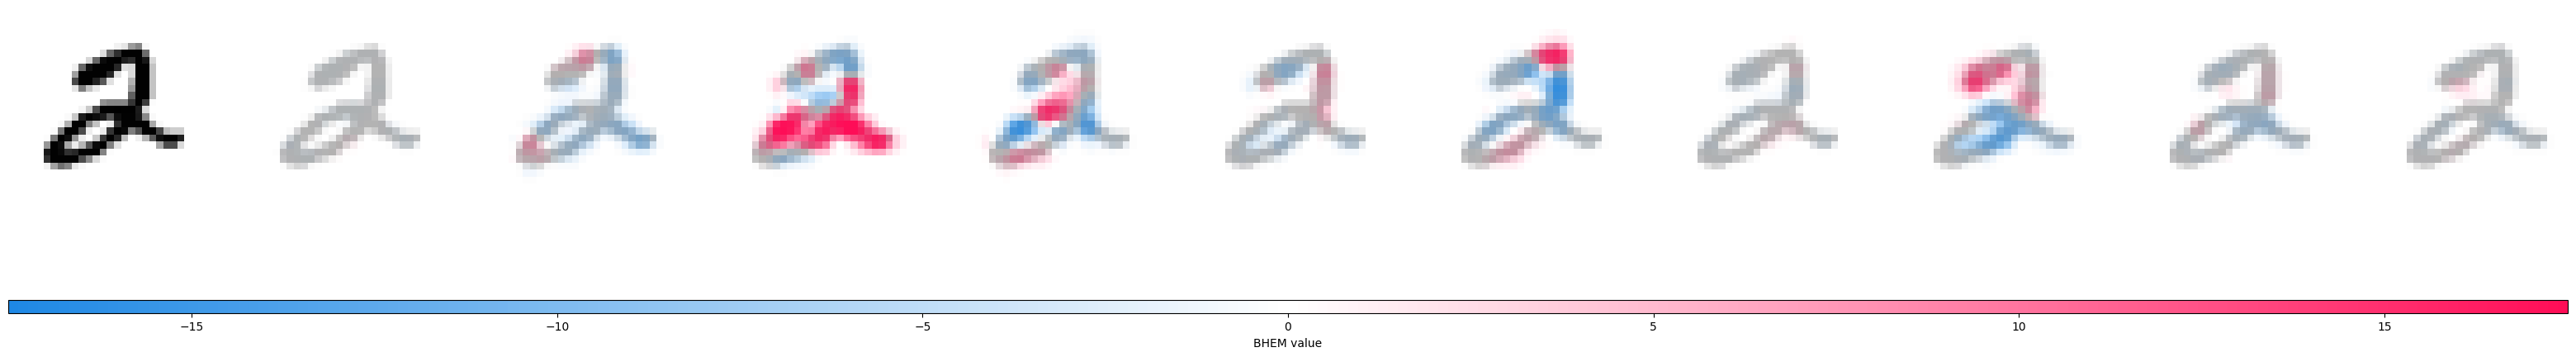

In [29]:
# RC Viz Code
from matplotlib.colors import LinearSegmentedColormap
colors = []
for j in np.linspace(1, 0, 100):
    colors.append((30./255, 136./255, 229./255,j))
for j in np.linspace(0, 1, 100):
    colors.append((255./255, 13./255, 87./255,j))
red_transparent_blue = LinearSegmentedColormap.from_list("red_transparent_blue", colors)

fig, axes = plt.subplots(nrows=1, ncols=11, figsize=(40,10), squeeze=False)

axes[0, 0].imshow(orig_img, cmap=plt.get_cmap("gray_r"))
axes[0][0].axis('off')
max_val = np.nanpercentile(result[0], 99.9)
for i in range(10):
    axes[0][i+1].imshow(-bhem_exp.image, cmap='gray', alpha=0.3)
    axes[0][i+1].imshow(resized_images[0][i], cmap=red_transparent_blue, vmin=-np.nanpercentile(result[0], 99.9),vmax=np.nanpercentile(result[0], 99.9))
    axes[0][i+1].axis('off')
    im = axes[0, i+1].imshow(resized_images[0][i], cmap=red_transparent_blue, vmin=-max_val, vmax=max_val)

plt.colorbar( im, ax=np.ravel(axes).tolist(), label="BHEM value", orientation="horizontal", aspect=40 / 0.2)

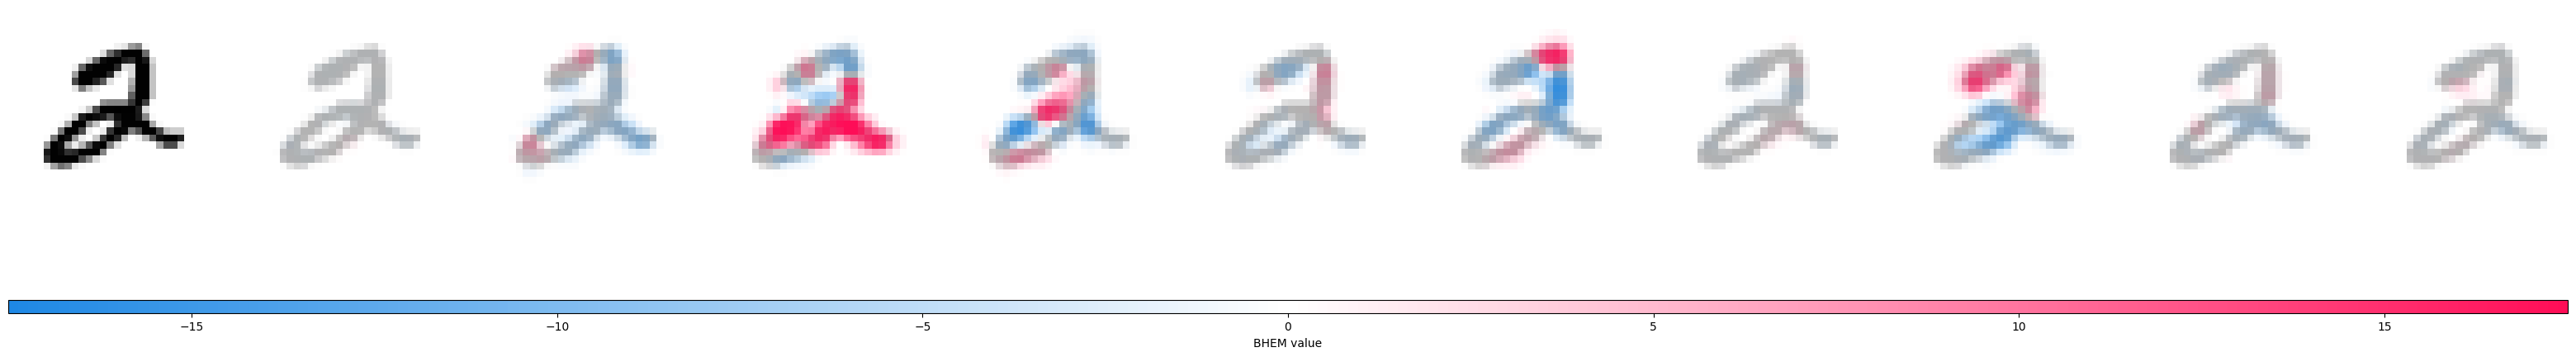

In [30]:
bhem_exp.plot_viz(result, resized_images)